In [4]:
# Setup environment
using PyPlot
using Printf
using LinearAlgebra
using FFTW
tol=1e-12;

In [2]:
# Make 3-d PPP operator 
function mkA_PPP(Nx,Ny,Nz)
 NN=Nx*Ny*Nz;
 A=zeros(NN,NN)
 # Modulo and offset for 1 based index
 MOD(i,n)=mod(i-1,n)+1
 OFF(i,j,k,ni,nj,nk)= (k-1)*ni*nj + (j-1)*ni + (i-1) + 1 
 for k=1:Nz
  for j=1:Ny
   for i=1:Nx
    ic=i ; iw=MOD(i-1,Nx); ie=MOD(i+1,Nx)
    jc=j ; js=MOD(j-1,Ny); jn=MOD(j+1,Ny)
    kc=k ; ku=MOD(k-1,Nz); kd=MOD(k+1,Nz)
    offc=OFF(i , j, k, Nx, Ny, Nz)
    offw=OFF(iw, j, k, Nx, Ny, Nz)
    offe=OFF(ie, j, k, Nx, Ny, Nz)
    offs=OFF( i,js, k, Nx, Ny, Nz)
    offn=OFF( i,jn, k, Nx, Ny, Nz)
    offu=OFF( i, j,ku, Nx, Ny, Nz)
    offd=OFF( i, j,kd, Nx, Ny, Nz)
    A[offc,offc]=-6
    A[offc,offw]= A[offc,offw]+1
    A[offc,offe]= A[offc,offe]+1
    A[offc,offs]= A[offc,offs]+1
    A[offc,offn]= A[offc,offn]+1
    A[offc,offu]= A[offc,offu]+1
    A[offc,offd]= A[offc,offd]+1         
   end
  end
 end

 # show(IOContext(stdout), "text/plain", Matrix(A))
 return A, Nx, Ny, Nz, NN
end
APPP,Nx,Ny,Nz,NN=mkA_PPP(3,3,3);

A=APPP;
show(IOContext(stdout), "text/plain", Int.(Matrix(A)))

27×27 Array{Int64,2}:
 -6   1   1   1   0   0   1   0   0   1   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0
  1  -6   1   0   1   0   0   1   0   0   1   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
  1   1  -6   0   0   1   0   0   1   0   0   1   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
  1   0   0  -6   1   1   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   1   0   0   0   0   0
  0   1   0   1  -6   1   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   1   0   0   0   0
  0   0   1   1   1  -6   0   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   1   0   0   0
  1   0   0   1   0   0  -6   1   1   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   1   0   0
  0   1   0   0   1   0   1  -6   1   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   1   0
  0   0   1   0   0   1   1   1  -6   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   1
  1   

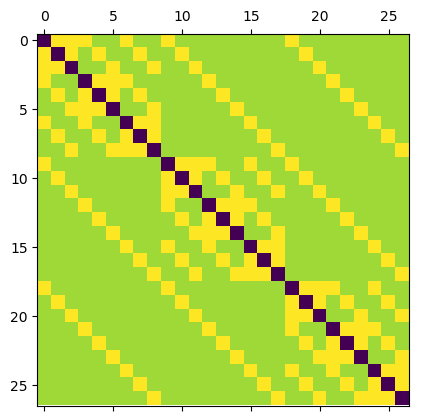

PyObject <matplotlib.image.AxesImage object at 0x000000003D6A3240>

In [3]:
PyPlot.matshow(A)

In [4]:
# Make 3-d PPN operator 
function mkA_PPN(Nx,Ny,Nz)
 NN=Nx*Ny*Nz;
 A=zeros(NN,NN)
 # Modulo and offset for 1 based index
 MOD(i,n)=mod(i-1,n)+1
 OFF(i,j,k,ni,nj,nk)= (k-1)*ni*nj + (j-1)*ni + (i-1) + 1 
 for k=1:Nz
  for j=1:Ny
   for i=1:Nx
    ic=i ; iw=MOD(i-1,Nx); ie=MOD(i+1,Nx)
    jc=j ; js=MOD(j-1,Ny); jn=MOD(j+1,Ny)
    kc=k ; ku=MOD(k-1,Nz); kd=MOD(k+1,Nz)
    offc=OFF(i , j, k, Nx, Ny, Nz)
    offw=OFF(iw, j, k, Nx, Ny, Nz)
    offe=OFF(ie, j, k, Nx, Ny, Nz)
    offs=OFF( i,js, k, Nx, Ny, Nz)
    offn=OFF( i,jn, k, Nx, Ny, Nz)
    offu=OFF( i, j,ku, Nx, Ny, Nz)
    offd=OFF( i, j,kd, Nx, Ny, Nz)
    A[offc,offc]=-6
    A[offc,offw]= A[offc,offw]+1
    A[offc,offe]= A[offc,offe]+1
    A[offc,offs]= A[offc,offs]+1
    A[offc,offn]= A[offc,offn]+1
    if k == 1
     A[offc,offu]= A[offc,offu]+0
     A[offc,offc]= A[offc,offc]+1
     A[offc,offd]= A[offc,offd]+1   
    elseif k == Nz
     A[offc,offu]= A[offc,offu]+1
     A[offc,offc]= A[offc,offc]+1
     A[offc,offd]= A[offc,offd]+0   
    else
     A[offc,offu]= A[offc,offu]+1
     A[offc,offd]= A[offc,offd]+1 
    end
   end
  end
 end

 # show(IOContext(stdout), "text/plain", Matrix(A))
 return A, Nx, Ny, Nz, NN
end
APPN,Nx,Ny,Nz,NN=mkA_PPN(10,10,10);

A=APPN;
# show(IOContext(stdout), "text/plain", Int.(Matrix(A)))

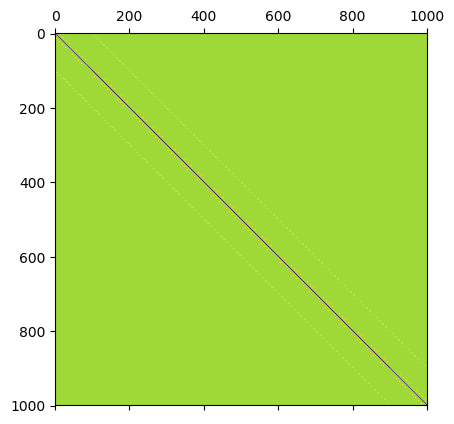

PyObject <matplotlib.image.AxesImage object at 0x000000003D76F0F0>

In [5]:
PyPlot.matshow(A)

In [6]:
# Show eigen vectors
E=eigen(A);El=E.values;Ev=E.vectors
# println("eigen values ")
# show(IOContext(stdout), "text/plain", El )
# println("\n")
# println("eigen vectors ")
# show(IOContext(stdout), "text/plain", Matrix(Ev) )
# println("\n")

1000×1000 Array{Float64,2}:
 -0.00699596  -0.0138197   0.00812746  …  -0.0601711    0.0441708  0.0316228
  0.00699596   0.0138197  -0.00985291     -0.0601572    0.0441708  0.0316228
 -0.00699596  -0.0138197   0.0113192      -0.0481235    0.0441708  0.0316228
  0.00699596   0.0138197  -0.0119663      -0.0286664    0.0441708  0.0316228
 -0.00699596  -0.0138197   0.011547       -0.009218     0.0441708  0.0316228
  0.00699596   0.0138197  -0.0102214   …   0.00279318   0.0441708  0.0316228
 -0.00699596  -0.0138197   0.00849598      0.00277925   0.0441708  0.0316228
  0.00699596   0.0138197  -0.00702968     -0.00925448   0.0441708  0.0316228
 -0.00699596  -0.0138197   0.00638261     -0.0287115    0.0441708  0.0316228
  0.00699596   0.0138197  -0.00680192     -0.0481599    0.0441708  0.0316228
  0.00699596   0.0138197  -0.00494944  …  -0.0618312    0.0441708  0.0316228
 -0.00699596  -0.0138197   0.00667489     -0.0618173    0.0441708  0.0316228
  0.00699596   0.0138197  -0.00814119     -0.049

In [7]:
# Create a RHS
N=size(A)[1]
f=rand(N,1);
# f=ones(N,1);
# f=[1/3 1/3 1/3]';
f=E.vectors[:,1];
display(reshape(f,Nx,Ny,Nz))

f=f.-sum(f)/N;
# println(" f = ",f)
# println(" L2(f)", sum(f.*f))

10×10×10 Array{Float64,3}:
[:, :, 1] =
 -0.00699596   0.00699596  -0.00699596  …  -0.00699596   0.00699596
  0.00699596  -0.00699596   0.00699596      0.00699596  -0.00699596
 -0.00699596   0.00699596  -0.00699596     -0.00699596   0.00699596
  0.00699596  -0.00699596   0.00699596      0.00699596  -0.00699596
 -0.00699596   0.00699596  -0.00699596     -0.00699596   0.00699596
  0.00699596  -0.00699596   0.00699596  …   0.00699596  -0.00699596
 -0.00699596   0.00699596  -0.00699596     -0.00699596   0.00699596
  0.00699596  -0.00699596   0.00699596      0.00699596  -0.00699596
 -0.00699596   0.00699596  -0.00699596     -0.00699596   0.00699596
  0.00699596  -0.00699596   0.00699596      0.00699596  -0.00699596

[:, :, 2] =
  0.0203031  -0.0203031   0.0203031  …  -0.0203031   0.0203031  -0.0203031
 -0.0203031   0.0203031  -0.0203031      0.0203031  -0.0203031   0.0203031
  0.0203031  -0.0203031   0.0203031     -0.0203031   0.0203031  -0.0203031
 -0.0203031   0.0203031  -0.0203031      0.

In [8]:
# Show FFT wave number amplitudes
fND=reshape(f,Nx,Ny,Nz)
ff=FFTW.fft(fND)
# println( ff        )
display( real.(ff .* conj.(ff)) )
display( round.(real.(ff .* conj.(ff)) ))

10×10×10 Array{Float64,3}:
[:, :, 1] =
 1.38739e-30  5.60047e-32  6.67555e-31  …  6.67555e-31  5.60047e-32
 1.27559e-31  7.98915e-33  4.75117e-31     4.36471e-31  2.43758e-32
 6.6059e-31   2.22547e-31  2.1993e-31      2.64169e-31  2.24772e-31
 1.20078e-31  2.42989e-31  3.09003e-31     5.93854e-32  4.27867e-32
 6.13427e-31  7.72011e-31  9.14852e-32     7.73736e-31  9.82657e-31
 7.70372e-32  2.06148e-31  4.73924e-31  …  4.73924e-31  2.06148e-31
 6.13427e-31  9.82657e-31  7.73736e-31     9.14852e-32  7.72011e-31
 1.20078e-31  4.27867e-32  5.93854e-32     3.09003e-31  2.42989e-31
 6.6059e-31   2.24772e-31  2.64169e-31     2.1993e-31   2.22547e-31
 1.27559e-31  2.43758e-32  4.36471e-31     4.75117e-31  7.98915e-33

[:, :, 2] =
 6.9884e-31   5.79994e-31  4.65942e-31  …  1.41411e-30  4.93561e-31
 2.48197e-32  7.50215e-31  1.72225e-31     4.68375e-31  4.0586e-31 
 5.64124e-31  2.1618e-32   2.55351e-31     4.3708e-32   2.39163e-31
 2.18366e-31  7.39401e-32  3.32523e-31     1.43261e-31  3.06892e

10×10×10 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[:, :, 2] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

In [9]:
# Solve Eigen style
F=(E.vectors)'*f;
# println("f projected onto eigen vectors",F)
λ=E.values;
rλ=map(x -> if (abs(x)>tol) 1.0/x;  else 0. ; end , λ);
Φ=F.*rλ;
# println("ϕ projected onto eigen vectors",Φ)
ϕ=(E.vectors)*Φ
# println("ϕ (eigen vectors projected onto Φ)",ϕ)
# println(A*ϕ)
# println(f)
# println(A*ϕ-f)

1000-element Array{Float64,1}:
  0.0005877915911165669
 -0.0005877915911165675
  0.0005877915911165583
 -0.0005877915911165643
  0.0005877915911165676
 -0.0005877915911165699
  0.0005877915911165621
 -0.0005877915911165663
  0.0005877915911165643
 -0.0005877915911165604
 -0.0005877915911165655
  0.0005877915911165622
 -0.0005877915911165695
  ⋮                    
 -0.0005877915911164877
  0.0005877915911165625
  0.0005877915911166009
 -0.000587791591116546 
  0.000587791591116498 
 -0.0005877915911165495
  0.0005877915911165606
 -0.0005877915911165413
  0.0005877915911165908
 -0.0005877915911165298
  0.0005877915911166195
 -0.0005877915911165228

In [5]:
using Statistics: mean
Nx, Ny, Nz = 10, 10, 10
f = rand(Nx, Ny, Nz)
f .= f .- mean(f)
sum(f)

-4.063416270128073e-14

In [6]:
# Solve FFT style
function mkwaves(N,L)
 scyc=zeros(N,1); sneu=zeros(N,1);
 for i in 1:N
  scyc[i]=(2*sin((i-1)*π/N)/(L/N)).^2
  sneu[i]=(2*sin((i-1)*π/(2*(N)))/(L/N)).^2 
 end   
 return scyc, sneu
end

Lx=Nx;
Ly=Ny;
Lz=Nz;

# fz  = FFTW.r2r(f,FFTW.REDFT10,3)
# fxyz= FFTW.fft(fz,[1,2])

# fF1=FFTW.fft(reshape(f,Nx,Ny,Nz),[1,2]);
# fF2= FFTW.r2r(real.(fF1),FFTW.REDFT10)

fF1=FFTW.r2r(reshape(f,Nx,Ny,Nz),FFTW.REDFT10,3)
fF2= FFTW.fft(fF1,[1,2])

sxcyc, sxneu=mkwaves(Nx,Lx)
sycyc, syneu=mkwaves(Ny,Ly)
szcyc, szneu=mkwaves(Nz,Lz)
sx=sxcyc;
sy=sycyc;
sz=szneu;

# sx=sxneu;
# sy=syneu;

fFi=-fF2;

for i=1:Nx
 for j=1:Ny
  for k=1:Nz
   if i == 1 && j == 1 && k == 1
    fFi[i,j,k]=0;
   else
    fFi[i,j,k]=fFi[i,j,k]./(sx[i]+sy[j]+sz[k])
   end
  end
 end
end

fiF1=FFTW.ifft(fFi,[1,2])
fiF2=FFTW.r2r(real.(fiF1),FFTW.REDFT01,3)/(2*Nz)  
    
# fiF=reshape(fiF2,Nx*Ny*Nz);
fiF=fiF2
# println(f)
# println(A*fiF)
# println(f./(A*fiF))

10×10×10 Array{Float64,3}:
[:, :, 1] =
 0.219498   0.190362    0.113896    …  -0.0522771  0.149062   0.0337891
 0.0993771  0.165089    0.173376        0.0769153  0.143761   0.0223482
 0.064243   0.274603    0.202653       -0.045714   0.0366018  0.125618 
 0.128828   0.331777    0.335606       -0.0156431  0.183485   0.151821 
 0.222607   0.414028    0.422667        0.125065   0.191446   0.284385 
 0.191292   0.353248    0.446764    …   0.167919   0.231745   0.189899 
 0.346378   0.319743    0.333605       -0.0193083  0.192614   0.287298 
 0.196261   0.135301    0.121886       -0.124135   0.180372   0.282174 
 0.229647   0.0905569   0.124656       -0.188804   0.134381   0.174633 
 0.131771   0.0622367  -0.00556248     -0.174517   0.083888   0.0673701

[:, :, 2] =
 0.14484   0.0730695  0.0350043  …  -0.136162    0.0638189   0.0654104 
 0.178706  0.0960154  0.0231162     -0.065758    0.00502883  0.00533613
 0.161241  0.243414   0.171819       0.0629389  -0.0138972   0.138915  
 0.271888  0

In [7]:
@inline incmod1(a, n) = a == n ? one(a) : a + 1
@inline decmod1(a, n) = a == 1 ? n : a - 1

function laplacian3d_ppn(f)
    Nx, Ny, Nz = size(f)
    ∇²f = zeros(Nx, Ny, Nz)
    for k in 2:(Nz-1), j in 1:Ny, i in 1:Nx
       ∇²f[i, j, k] = f[incmod1(i, Nx), j, k] + f[decmod1(i, Nx), j, k] + f[i, incmod1(j, Ny), k] + f[i, decmod1(j, Ny), k] + f[i, j, k+1] + f[i, j, k-1] - 6*f[i, j, k]
    end
    for j in 1:Ny, i in 1:Nx
        ∇²f[i, j,   1] = -(f[i, j,     1] - f[i, j,   2]) + f[incmod1(i, Nx), j,   1] + f[decmod1(i, Nx), j,   1] + f[i, incmod1(j, Ny),   1] + f[i, decmod1(j, Ny),   1] - 4*f[i, j,   1]
        ∇²f[i, j, end] =  (f[i, j, end-1] - f[i, j, end]) + f[incmod1(i, Nx), j, end] + f[decmod1(i, Nx), j, end] + f[i, incmod1(j, Ny), end] + f[i, decmod1(j, Ny), end] - 4*f[i, j, end]
    end
    ∇²f
end

laplacian3d_ppn (generic function with 1 method)

In [9]:
laplacian3d_ppn(fiF) ≈ f

true

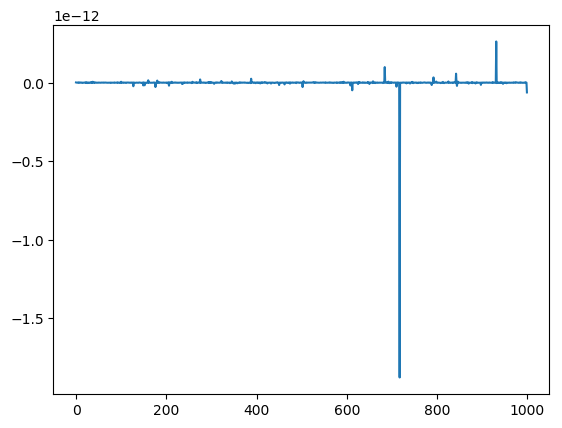

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000003FC0128>

In [55]:
tmp = reshape(f, Nx*Ny*Nz) ./ (A * reshape(fiF2,Nx*Ny*Nz))
PyPlot.plot(tmp.-1)

In [96]:
using BenchmarkTools

┌ Info: Recompiling stale cache file C:\Users\Ali\.julia\compiled\v1.0\BenchmarkTools\ZXPQo.ji for BenchmarkTools [6e4b80f9-dd63-53aa-95a3-0cdb28fa8baf]
└ @ Base loading.jl:1184


In [97]:
@benchmark laplacian(fiF)

BenchmarkTools.Trial: 
  memory estimate:  7.94 KiB
  allocs estimate:  1
  --------------
  minimum time:     6.710 μs (0.00% GC)
  median time:      8.752 μs (0.00% GC)
  mean time:        14.516 μs (19.43% GC)
  maximum time:     13.418 ms (99.92% GC)
  --------------
  samples:          10000
  evals/sample:     5